<a href="https://colab.research.google.com/github/SuraRzayeva/PopularityOfOnlineContent/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B.Sc. Thesis - 2022/SS - Sura Rzayeva

### Predicting the future popularity of online content based on early observations.

#### Importing libraries

In [1]:
import pandas as pd
from datetime import date
import calendar
import holidays
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#### Loading dataset

In [2]:
raw_df = pd.read_csv('./dataset.csv')

raw_df

,title,genres,cats,meta_cname,program_start,program_end,total_users
0,Sportschau,NaN,Sports,ard,2021-07-25 07:05:00 UTC,2021-07-25 15:00:00 UTC,297716
1,"2021! Menschen, Bilder, Emotionen",NaN,Entertainment,rtl_deutschland,2021-12-05 19:15:00 UTC,2021-12-05 23:00:00 UTC,254859
2,Schlag den Star,Game Show,Entertainment,pro7_deutschland,2022-01-29 19:15:00 UTC,2022-01-29 23:20:00 UTC,231073
3,Bundestagswahl 2021,News:Politics,Information,ard,2021-09-26 15:15:00 UTC,2021-09-26 18:00:00 UTC,216943
4,Schlag den Star,Game Show,Entertainment,pro7_deutschland,2021-11-27 19:15:00 UTC,2021-11-27 23:15:00 UTC,214322
...,...,...,...,...,...,...,...
1050033,Le journal de la nuit,Weather,Information,canalF_la_chaine_meteo,2021-08-09 20:00:00 UTC,2021-08-10 04:30:00 UTC,1001
1050034,Tagesschau,Magazine:News:Politics:Weather,Information,das_erste_de,2022-05-24 13:00:00 UTC,2022-05-24 13:10:00 UTC,1001
1050035,Infomercial,Home Shopping,Information,tele-5,2022-05-19 23:55:00 UTC,2022-05-20 00:10:00 UTC,1001
1050036,Mountain Men - Überleben in der Wildnis,Nature:Reality,Series,kabel1_doku,2021-10-14 12:45:00 UTC,2021-10-14 13:25:00 UTC,1001


#### Dropping rows with any missing values

In [3]:
raw_df.isna().sum()

title                 3
genres           111727
cats              34375
meta_cname            0
program_start         0
program_end           0
total_users           0
dtype: int64

In [4]:
df = raw_df.dropna(axis=0)

In [5]:
df.isna().sum()

title            0
genres           0
cats             0
meta_cname       0
program_start    0
program_end      0
total_users      0
dtype: int64

#### Analyzing the data

In [ ]:
len(df.title.unique())

55656

In [ ]:
len(df.genres.unique())

2487

In [ ]:
sorted(df.title.unique())

['#1 Hits Weekend',
 '#BeatYesterday',
 '#Dieselgate',
 '#Female Pleasure',
 '#GoVote Weekend',
 '#Horror',
 '#JR',
 '#KlimaAlarm - Sind wir noch zu retten?',
 '#Philo',
 '#Pire soirée',
 '#SRF global',
 '#SRFglobal',
 '#ScrivimiAncora',
 '#SuperBeste Lehrerin',
 '#SuperBesteLehrerin',
 '#Ukraine - Wie erleben wir den Krieg',
 '#Ukraine - Wie wir den Krieg erleben',
 '#UnserWesten, unsere beliebten FotoHotspots',
 '#UnserWesten, unsere beliebten FotoHotspots - Kultstätten',
 '#VOXStimme',
 '#VOXforWomen - Das Event',
 '#WIR - Freundschaft grenzenlos',
 '#beisenherz',
 '#beisenherz Spezial',
 '#cartabianca',
 '#heimatliebe',
 '#heuldoch - Therapie wie noch nie',
 '#hrWahl - Hessen hat gewählt',
 '#investigation',
 '#ranNFLsüchtig',
 '#rosenfeld/feldenkirchen',
 '#vanlife - Leben im Camper',
 "'1vo4'",
 "'303'",
 "'71",
 "'Amerikas beste Idee'",
 "'Baikal ist alles!'",
 "'Die Wilden' in den Menschenzoos",
 "'Diesen Kuss der ganzen Welt' - Beethoven heute",
 "'Dirty Dancing' in Ost und We

#### Generating new features

In [6]:
df.program_start = pd.to_datetime(df.program_start)
df.program_end = pd.to_datetime(df.program_end)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df['duration'] = df.program_end - df.program_start

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df['duration'] = df['duration'].dt.total_seconds().div(60).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['year'] = df.program_start.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['month'] = df.program_start.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df['days'] = df.program_start.dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['hour'] = df.program_start.dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
week_day = []
for i in df.program_start:
    week_day_ = i.strftime("%w")
    week_day.append(week_day_)

df['week_day'] = week_day
df['week_day'] = df['week_day'].apply(lambda x: int(x) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
weekend = []
for i in df.week_day:
    if int(i) > 5:
        weekend.append(True)
    else:
        weekend.append(False)

df['is_weekend'] = weekend

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
season = []
for i in df.month:
    if int(i) == 1 or int(i) == 12 or int(i) == 2:
      season.append('Winter')
    elif int(i) == 3 or int(i) == 4 or int(i) == 5:
      season.append('Spring')
    elif int(i) == 6 or int(i) == 7 or int(i) == 8:
      season.append('Summer')
    elif int(i) == 9 or int(i) == 10 or int(i) == 11:
      season.append('Autumn')

df['season'] = season

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [16]:
prime_time = []

for h in df.hour:
    if int(h) > 20:
        prime_time.append(True)
    else:
        prime_time.append(False)

df['prime_time'] = prime_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
df.hour.unique()

array([19, 15, 18, 21,  5,  8, 17,  7,  9, 20, 11, 10,  3, 16,  4, 13,  6,
       22, 23, 12, 14,  0,  2,  1])

In [18]:
de_holidays = holidays.DE()

df['is_holiday'] = df['program_start'].apply(lambda x: x in de_holidays)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df['holiday_name'] = df['program_start'].apply(lambda x: de_holidays.get(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df['is_holiday'].value_counts()

False    897238
True      25926
Name: is_holiday, dtype: int64

In [21]:
df['holiday_name'].value_counts()

Zweiter Weihnachtstag        3069
Tag der Deutschen Einheit    3019
Neujahr                      2988
Erster Mai                   2958
Erster Weihnachtstag         2954
Karfreitag                   2782
Christi Himmelfahrt          2761
Pfingstmontag                2757
Ostermontag                  2638
Name: holiday_name, dtype: int64

In [22]:
df

,title,genres,cats,meta_cname,program_start,program_end,total_users,duration,year,month,days,hour,week_day,is_weekend,season,prime_time,is_holiday,holiday_name
2,Schlag den Star,Game Show,Entertainment,pro7_deutschland,2022-01-29 19:15:00+00:00,2022-01-29 23:20:00+00:00,231073,245,2022,1,29,19,7,True,Winter,False,False,None
3,Bundestagswahl 2021,News:Politics,Information,ard,2021-09-26 15:15:00+00:00,2021-09-26 18:00:00+00:00,216943,165,2021,9,26,15,1,False,Autumn,False,False,None
4,Schlag den Star,Game Show,Entertainment,pro7_deutschland,2021-11-27 19:15:00+00:00,2021-11-27 23:15:00+00:00,214322,240,2021,11,27,19,7,True,Autumn,False,False,None
5,Schlag den Star,Game Show,Entertainment,pro7_deutschland,2021-12-18 19:15:00+00:00,2021-12-18 23:20:00+00:00,211244,245,2021,12,18,19,7,True,Winter,False,False,None
6,"Wetten, dass..?",Game Show,Entertainment,zdf,2021-11-06 19:15:00+00:00,2021-11-06 22:15:00+00:00,205743,180,2021,11,6,19,7,True,Autumn,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050033,Le journal de la nuit,Weather,Information,canalF_la_chaine_meteo,2021-08-09 20:00:00+00:00,2021-08-10 04:30:00+00:00,1001,510,2021,8,9,20,2,False,Summer,False,False,None
1050034,Tagesschau,Magazine:News:Politics:Weather,Information,das_erste_de,2022-05-24 13:00:00+00:00,2022-05-24 13:10:00+00:00,1001,10,2022,5,24,13,3,False,Spring,False,False,None
1050035,Infomercial,Home Shopping,Information,tele-5,2022-05-19 23:55:00+00:00,2022-05-20 00:10:00+00:00,1001,15,2022,5,19,23,5,False,Spring,True,False,None
1050036,Mountain Men - Überleben in der Wildnis,Nature:Reality,Series,kabel1_doku,2021-10-14 12:45:00+00:00,2021-10-14 13:25:00+00:00,1001,40,2021,10,14,12,5,False,Autumn,False,False,None


In [23]:
df = df.drop(columns=["program_start", "program_end"])

In [24]:
df.head(10)

,title,genres,cats,meta_cname,total_users,duration,year,month,days,hour,week_day,is_weekend,season,prime_time,is_holiday,holiday_name
2,Schlag den Star,Game Show,Entertainment,pro7_deutschland,231073,245,2022,1,29,19,7,True,Winter,False,False,None
3,Bundestagswahl 2021,News:Politics,Information,ard,216943,165,2021,9,26,15,1,False,Autumn,False,False,None
4,Schlag den Star,Game Show,Entertainment,pro7_deutschland,214322,240,2021,11,27,19,7,True,Autumn,False,False,None
5,Schlag den Star,Game Show,Entertainment,pro7_deutschland,211244,245,2021,12,18,19,7,True,Winter,False,False,None
6,"Wetten, dass..?",Game Show,Entertainment,zdf,205743,180,2021,11,6,19,7,True,Autumn,False,False,None
7,Schlag den Star,Game Show,Entertainment,pro7_deutschland,203658,240,2021,8,28,18,7,True,Summer,False,False,None
8,Wer weiß denn sowas XXL,Game Show,Entertainment,ard,202686,190,2022,1,22,19,7,True,Winter,False,False,None
9,Schlag den Star,Game Show,Entertainment,pro7_deutschland,192485,220,2022,1,8,19,7,True,Winter,False,False,None
10,Hirschhausens Quiz des Menschen,Game Show,Entertainment,ard,189188,180,2022,3,5,19,7,True,Spring,False,False,None
11,Schlag den Star,Game Show,Entertainment,pro7_deutschland,183474,250,2021,9,18,18,7,True,Autumn,False,False,None


In [ ]:
# df.to_csv('tv_clean.csv')

#### Cleaning the features

In [25]:
len(list(df.genres.unique()))

2487

In [26]:
genres_list = []

for row in df['genres']:
    genres_list.append(row.split(':')[0])

genres_list
df['genres'] = genres_list

In [27]:
len(list(df.genres.unique()))

102

In [28]:
for i in df.genres.unique():
    print(i)

Game Show
News
Travel
Reality
Adventure
Soccer
Magazine
Music
Science Fiction
Drama
Action
Winter Sports
Comedy
Music Show
Romance & Love
Crime
Boxing
Pop & Rock
Thriller
Politics
Olympics
Dance
Football
Knowledge
Culture
Musical
Humour
Athletics
Equestrian
Entertainment show
Report
Cookery Show
Aquatic Sports
Folk Music
Documentary
Motor Sports
Handball
Darts
Children's Show
Talk Show
Curling
US Sports
Mystery 
Society
Fantasy
Soap
Nature
Western
Biography
History
Rugby
Health
Economy
Mystery
Tennis
Family
Golf
Team Sports
Cartoon
Horror
Advice
Fairy Tale
Animals
Children's Movie
Hurling
Basketball
Motor & Traffic
Cycling
Gaelic Games
Courtroom Reality Show
Hospital
Regional Background
Classical Music
Martial Arts
Home & Garden
Home Improvement
Interview
Religion
Music Clips
Ice Hockey
War
Extreme Sports
Weather
Erotic
Home Shopping
Cinema
Children's Series
Theater
eSports
Volleyball
Anime
Other Sports
Award show
Cricket
Youth
Queer
Music Movie
Children's News
Fishing
Jazz
Disasters
C

In [29]:
Sport = ["Soccer", "Boxing", "Winter Sports", "Olympics", "Football", "Athletics", "Equestrian", "Aquatic Sports", "Handball",  "Darts", "Curling", "US Sports", "Rugby", "Tennis", "Golf", "Team Sports", "Hurling", "Basketball", "Martial Arts", "Cycling", "Ice Hockey", "Gaelic Games", "Volleyball", "Extreme Sports", "Other Sports", "eSports", "Cricket"]
Music = ["Music", "Music Show", "Pop & Rock", "Folk Music", "Classical Music", "Music Clips", "Music Movie", "Musical", "Jazz"]
Children = ["Children's Show", "Children's Movie", "Children's Series", "Children's News"]
Hobby = ["Home Improvement", "Fishing", "Home & Garden"]
Reality = ["Reality", "Courtroom Reality Show"]
Talk = ["Talk Show", "Interview"]
Youth = ["Youth", "Coming-of-Age"]
News = ["News", "Report", "Disasters"]
Show = ["Entertainment show", "Award show", "Game Show"]
Fantasy = ["Fantasy", "Fairy Tale"]
Cars = ["Motor Sports", "Motor & Traffic"]
Health = ["Health", "Hospital"]

modified_genres = []

for value in df.genres:
    if value in Sport:
      modified_genres.append('Sport')
    elif value in Music:
      modified_genres.append('Music')
    elif value in Children:
      modified_genres.append('Children')
    elif value in Hobby:
      modified_genres.append('Hobby')
    elif value in Reality:
      modified_genres.append('Reality')
    elif value in Talk:
      modified_genres.append('Talk')
    elif value in Youth:
      modified_genres.append('Youth')
    elif value in News:
      modified_genres.append('News')
    elif value in Show:
      modified_genres.append('Show')
    elif value in Fantasy:
      modified_genres.append('Fantasy')
    elif value in Cars:
      modified_genres.append('Cars')
    elif value in Health:
      modified_genres.append('Health')
    else:
      modified_genres.append(value)
  
df['genres'] = modified_genres

In [30]:
len(list(df.genres))

923164

In [31]:
list(df.genres.unique())

['Show',
 'News',
 'Travel',
 'Reality',
 'Adventure',
 'Sport',
 'Magazine',
 'Music',
 'Science Fiction',
 'Drama',
 'Action',
 'Comedy',
 'Romance & Love',
 'Crime',
 'Thriller',
 'Politics',
 'Dance',
 'Knowledge',
 'Culture',
 'Humour',
 'Cookery Show',
 'Documentary',
 'Cars',
 'Children',
 'Talk',
 'Mystery ',
 'Society',
 'Fantasy',
 'Soap',
 'Nature',
 'Western',
 'Biography',
 'History',
 'Health',
 'Economy',
 'Mystery',
 'Family',
 'Cartoon',
 'Horror',
 'Advice',
 'Animals',
 'Regional Background',
 'Hobby',
 'Religion',
 'War',
 'Weather',
 'Erotic',
 'Home Shopping',
 'Cinema',
 'Theater',
 'Anime',
 'Youth',
 'Queer']

In [32]:
df.head()

,title,genres,cats,meta_cname,total_users,duration,year,month,days,hour,week_day,is_weekend,season,prime_time,is_holiday,holiday_name
2,Schlag den Star,Show,Entertainment,pro7_deutschland,231073,245,2022,1,29,19,7,True,Winter,False,False,None
3,Bundestagswahl 2021,News,Information,ard,216943,165,2021,9,26,15,1,False,Autumn,False,False,None
4,Schlag den Star,Show,Entertainment,pro7_deutschland,214322,240,2021,11,27,19,7,True,Autumn,False,False,None
5,Schlag den Star,Show,Entertainment,pro7_deutschland,211244,245,2021,12,18,19,7,True,Winter,False,False,None
6,"Wetten, dass..?",Show,Entertainment,zdf,205743,180,2021,11,6,19,7,True,Autumn,False,False,None


#### Categorizing the target variable (total_users)

In [ ]:
# %matplotlib inline
# plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# plt.hist(df['total_users'], bins=20)
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [ ]:
# fig = plt.figure(figsize =(10, 7))
 
# # Creating plot
# plt.boxplot(df.total_users)
 
# # show plot
# plt.show()

In [ ]:
# fig = px.box(df, y="total_users")
# fig.show()

In [33]:
popularity_cat = []

for row in df['total_users']:
    if row > 20000:
        popularity_cat.append('star')
    elif row < 20000 and row > 7000:
        popularity_cat.append('popular')
    elif row < 7000 and row > 2000:
        popularity_cat.append('medium')
    else:
        popularity_cat.append('unpopular')

df['popularity_cat'] = popularity_cat

In [34]:
df['popularity_cat'].unique()

array(['star', 'unpopular', 'popular', 'medium'], dtype=object)

In [35]:
df['popularity_cat'].value_counts()

unpopular    450728
medium       372162
popular       79882
star          20392
Name: popularity_cat, dtype: int64

In [ ]:
# df['popularity_cat'].value_counts().plot(kind='bar')

In [36]:
df.head(4)

,title,genres,cats,meta_cname,total_users,duration,year,month,days,hour,week_day,is_weekend,season,prime_time,is_holiday,holiday_name,popularity_cat
2,Schlag den Star,Show,Entertainment,pro7_deutschland,231073,245,2022,1,29,19,7,True,Winter,False,False,None,star
3,Bundestagswahl 2021,News,Information,ard,216943,165,2021,9,26,15,1,False,Autumn,False,False,None,star
4,Schlag den Star,Show,Entertainment,pro7_deutschland,214322,240,2021,11,27,19,7,True,Autumn,False,False,None,star
5,Schlag den Star,Show,Entertainment,pro7_deutschland,211244,245,2021,12,18,19,7,True,Winter,False,False,None,star


In [37]:
df.to_csv('cleaned_data.csv', index = False)

#### Encoding the values in features

In [38]:
from sklearn.preprocessing import LabelEncoder
ord_enc = LabelEncoder()

cat_column_names = ['title', 'genres', 'cats', 'meta_cname', 'duration', 'year', 'month', 'days', 'hour', 'week_day', 'is_weekend', 'season', 'prime_time', 
                    'is_holiday', 'holiday_name', 'popularity_cat']

for cat_col in cat_column_names:
    cat_col_name_encode = str(cat_col) + str('_encoded')
    df[cat_col_name_encode] = ord_enc.fit_transform(df[[cat_col]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
df.sample(10)

,title,genres,cats,meta_cname,total_users,duration,year,month,days,hour,...,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded,popularity_cat_encoded
722717,Geheimnisse des Firmaments,Knowledge,Documentaries,zdf-info,1499,45,2021,8,20,23,...,7,19,23,5,1,2,1,0,9,3
33346,Die Retourenprofis,Reality,Series,rtl2_deutschland,15877,125,2022,2,26,17,...,1,25,17,6,1,3,0,0,9,1
18169,Punkt 12 - Das RTL-Mittagsjournal,News,Information,rtl_deutschland,22245,180,2022,6,1,10,...,5,0,10,3,0,2,0,0,9,2
455842,Hits Only,Music,Entertainment,deluxe-music,2318,60,2021,11,12,21,...,10,11,21,5,1,0,1,0,9,0
23485,Kingsman: The Golden Circle,Action,Movies,eir_rte_two,19334,155,2022,6,11,20,...,5,10,20,6,1,2,0,0,9,1
728615,Monk,Crime,Series,zdfneo,1487,40,2022,4,13,13,...,3,12,13,3,0,1,0,0,9,3
193215,Der Trödeltrupp - Das Geld liegt im Keller,Reality,Series,rtl-2,4687,120,2022,4,16,16,...,3,15,16,6,1,1,0,0,9,0
490544,CSI: Miami,Action,Series,vox_deutschland,2168,55,2022,3,10,10,...,2,9,10,4,0,1,0,0,9,0
300827,CSI: Miami,Action,Series,super_rtl_deutschland,3318,65,2021,11,11,22,...,10,10,22,4,0,0,1,0,9,0
169913,Daniela Katzenberger - natürlich blond,Reality,Documentaries,vox_up_de,5153,65,2021,7,30,20,...,6,29,20,5,1,2,0,0,9,0


In [40]:
df.columns

Index(['title', 'genres', 'cats', 'meta_cname', 'total_users', 'duration',
       'year', 'month', 'days', 'hour', 'week_day', 'is_weekend', 'season',
       'prime_time', 'is_holiday', 'holiday_name', 'popularity_cat',
       'title_encoded', 'genres_encoded', 'cats_encoded', 'meta_cname_encoded',
       'duration_encoded', 'year_encoded', 'month_encoded', 'days_encoded',
       'hour_encoded', 'week_day_encoded', 'is_weekend_encoded',
       'season_encoded', 'prime_time_encoded', 'is_holiday_encoded',
       'holiday_name_encoded', 'popularity_cat_encoded'],
      dtype='object')

#### Slicing our dataset, in order to keep only the encoded columns for ML

In [41]:
df_ml = df.copy()

In [42]:
encoded_columns = df_ml.columns.str.contains('encoded')

df_ml = df_ml.loc[:,encoded_columns]

df_ml.columns

Index(['title_encoded', 'genres_encoded', 'cats_encoded', 'meta_cname_encoded',
       'duration_encoded', 'year_encoded', 'month_encoded', 'days_encoded',
       'hour_encoded', 'week_day_encoded', 'is_weekend_encoded',
       'season_encoded', 'prime_time_encoded', 'is_holiday_encoded',
       'holiday_name_encoded', 'popularity_cat_encoded'],
      dtype='object')

#### Scaling the values in features

In [43]:
df_ml.head(10)

,title_encoded,genres_encoded,cats_encoded,meta_cname_encoded,duration_encoded,year_encoded,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded,popularity_cat_encoded
2,42178,41,1,294,244,1,0,28,19,6,1,3,0,0,9,2
3,6297,33,2,24,164,0,8,25,15,0,0,0,0,0,9,2
4,42178,41,1,294,239,0,10,26,19,6,1,0,0,0,9,2
5,42178,41,1,294,244,0,11,17,19,6,1,3,0,0,9,2
6,52843,41,1,457,179,0,10,5,19,6,1,0,0,0,9,2
7,42178,41,1,294,239,0,7,27,18,6,1,2,0,0,9,2
8,52784,41,1,24,189,1,0,21,19,6,1,3,0,0,9,2
9,42178,41,1,294,219,1,0,7,19,6,1,3,0,0,9,2
10,21956,41,1,24,179,1,2,4,19,6,1,1,0,0,9,2
11,42178,41,1,294,249,0,8,17,18,6,1,0,0,0,9,2


In [44]:
# trans = MinMaxScaler()
# scaled_X = trans.fit_transform(df_ml.iloc(:, ))
# scaled_X

SyntaxError: ignored

In [ ]:
# scaled_X = pd.DataFrame(scaled_X)
# type(scaled_X)

pandas.core.frame.DataFrame

In [ ]:
# scaled_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.757847,0.788462,0.166667,0.637744,0.428822,1.0,0.000000,0.933333,0.826087,1.000000,1.0,1.000000,0.0,0.0,1.0,0.666667
1,0.113143,0.634615,0.333333,0.052061,0.288225,0.0,0.727273,0.833333,0.652174,0.000000,0.0,0.000000,0.0,0.0,1.0,0.666667
2,0.757847,0.788462,0.166667,0.637744,0.420035,0.0,0.909091,0.866667,0.826087,1.000000,1.0,0.000000,0.0,0.0,1.0,0.666667
3,0.757847,0.788462,0.166667,0.637744,0.428822,0.0,1.000000,0.566667,0.826087,1.000000,1.0,1.000000,0.0,0.0,1.0,0.666667
4,0.949474,0.788462,0.166667,0.991323,0.314587,0.0,0.909091,0.166667,0.826087,1.000000,1.0,0.000000,0.0,0.0,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923159,0.528793,0.961538,0.333333,0.125813,0.773286,0.0,0.636364,0.266667,0.869565,0.166667,0.0,0.666667,0.0,0.0,1.0,1.000000
923160,0.821687,0.538462,0.333333,0.206074,0.015817,1.0,0.363636,0.766667,0.565217,0.333333,0.0,0.333333,0.0,0.0,1.0,1.000000
923161,0.430132,0.461538,0.333333,0.854664,0.024605,1.0,0.363636,0.600000,1.000000,0.666667,0.0,0.333333,1.0,0.0,1.0,1.000000
923162,0.629413,0.615385,0.833333,0.470716,0.068541,0.0,0.818182,0.433333,0.521739,0.666667,0.0,0.000000,0.0,0.0,1.0,1.000000


In [ ]:
# df_ml.columns

Index(['title_encoded', 'genres_encoded', 'cats_encoded', 'meta_cname_encoded',
       'duration_encoded', 'year_encoded', 'month_encoded', 'days_encoded',
       'hour_encoded', 'week_day_encoded', 'is_weekend_encoded',
       'season_encoded', 'prime_time_encoded', 'is_holiday_encoded',
       'holiday_name_encoded', 'popularity_cat_encoded'],
      dtype='object')

In [ ]:
# scaled_X.columns = df_ml.columns

# scaled_X

,title_encoded,genres_encoded,cats_encoded,meta_cname_encoded,duration_encoded,year_encoded,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded,popularity_cat_encoded
0,0.757847,0.788462,0.166667,0.637744,0.428822,1.0,0.000000,0.933333,0.826087,1.000000,1.0,1.000000,0.0,0.0,1.0,0.666667
1,0.113143,0.634615,0.333333,0.052061,0.288225,0.0,0.727273,0.833333,0.652174,0.000000,0.0,0.000000,0.0,0.0,1.0,0.666667
2,0.757847,0.788462,0.166667,0.637744,0.420035,0.0,0.909091,0.866667,0.826087,1.000000,1.0,0.000000,0.0,0.0,1.0,0.666667
3,0.757847,0.788462,0.166667,0.637744,0.428822,0.0,1.000000,0.566667,0.826087,1.000000,1.0,1.000000,0.0,0.0,1.0,0.666667
4,0.949474,0.788462,0.166667,0.991323,0.314587,0.0,0.909091,0.166667,0.826087,1.000000,1.0,0.000000,0.0,0.0,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923159,0.528793,0.961538,0.333333,0.125813,0.773286,0.0,0.636364,0.266667,0.869565,0.166667,0.0,0.666667,0.0,0.0,1.0,1.000000
923160,0.821687,0.538462,0.333333,0.206074,0.015817,1.0,0.363636,0.766667,0.565217,0.333333,0.0,0.333333,0.0,0.0,1.0,1.000000
923161,0.430132,0.461538,0.333333,0.854664,0.024605,1.0,0.363636,0.600000,1.000000,0.666667,0.0,0.333333,1.0,0.0,1.0,1.000000
923162,0.629413,0.615385,0.833333,0.470716,0.068541,0.0,0.818182,0.433333,0.521739,0.666667,0.0,0.000000,0.0,0.0,1.0,1.000000


In [45]:
df_ml.head(5)

,title_encoded,genres_encoded,cats_encoded,meta_cname_encoded,duration_encoded,year_encoded,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded,popularity_cat_encoded
2,42178,41,1,294,244,1,0,28,19,6,1,3,0,0,9,2
3,6297,33,2,24,164,0,8,25,15,0,0,0,0,0,9,2
4,42178,41,1,294,239,0,10,26,19,6,1,0,0,0,9,2
5,42178,41,1,294,244,0,11,17,19,6,1,3,0,0,9,2
6,52843,41,1,457,179,0,10,5,19,6,1,0,0,0,9,2


In [46]:
df_ml.to_csv('encoded_data.csv', index = False)

In [47]:
df_ml = pd.read_csv('encoded_data.csv')

In [48]:
df_ml.head(5)

,title_encoded,genres_encoded,cats_encoded,meta_cname_encoded,duration_encoded,year_encoded,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded,popularity_cat_encoded
0,42178,41,1,294,244,1,0,28,19,6,1,3,0,0,9,2
1,6297,33,2,24,164,0,8,25,15,0,0,0,0,0,9,2
2,42178,41,1,294,239,0,10,26,19,6,1,0,0,0,9,2
3,42178,41,1,294,244,0,11,17,19,6,1,3,0,0,9,2
4,52843,41,1,457,179,0,10,5,19,6,1,0,0,0,9,2


##### (Experiment) find out highly correlated features (?)

In [49]:
X_cor = df_ml.iloc[:, 0:15]
y_cor = df_ml.iloc[:, 15]


In [50]:
df = pd.DataFrame(X_cor)

In [52]:
cor_matrix = df.corr().abs()

cor_matrix

,title_encoded,genres_encoded,cats_encoded,meta_cname_encoded,duration_encoded,year_encoded,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded
title_encoded,1.000000,0.106712,0.050953,0.013638,0.011696,0.006390,0.007629,0.001422,0.006260,0.001508,0.005877,0.006569,0.004150,0.006949,0.004938
genres_encoded,0.106712,1.000000,0.283644,0.075083,0.050044,0.000276,0.001328,0.003034,0.022943,0.002649,0.018735,0.007080,0.026861,0.014350,0.012094
cats_encoded,0.050953,0.283644,1.000000,0.051593,0.011430,0.032085,0.015873,0.002409,0.005488,0.014933,0.005250,0.003887,0.009551,0.013721,0.013700
meta_cname_encoded,0.013638,0.075083,0.051593,1.000000,0.058450,0.006613,0.002069,0.000120,0.078503,0.001985,0.007034,0.000777,0.028215,0.009198,0.007722
duration_encoded,0.011696,0.050044,0.011430,0.058450,1.000000,0.009458,0.009626,0.001002,0.039974,0.005744,0.028851,0.007402,0.030350,0.026741,0.020870
year_encoded,0.006390,0.000276,0.032085,0.006613,0.009458,1.000000,0.868356,0.085887,0.000506,0.000647,0.005086,0.317361,0.006329,0.041359,0.071847
month_encoded,0.007629,0.001328,0.015873,0.002069,0.009626,0.868356,1.000000,0.024827,0.000313,0.003700,0.000816,0.376209,0.009524,0.007520,0.024465
days_encoded,0.001422,0.003034,0.002409,0.000120,0.001002,0.085887,0.024827,1.000000,0.005499,0.004666,0.007360,0.004750,0.003211,0.045800,0.031170
hour_encoded,0.006260,0.022943,0.005488,0.078503,0.039974,0.000506,0.000313,0.005499,1.000000,0.006651,0.021378,0.002966,0.496156,0.026341,0.023308
week_day_encoded,0.001508,0.002649,0.014933,0.001985,0.005744,0.000647,0.003700,0.004666,0.006651,1.000000,0.800179,0.003401,0.023726,0.033432,0.019738


In [54]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

upper_tri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,title_encoded,genres_encoded,cats_encoded,meta_cname_encoded,duration_encoded,year_encoded,month_encoded,days_encoded,hour_encoded,week_day_encoded,is_weekend_encoded,season_encoded,prime_time_encoded,is_holiday_encoded,holiday_name_encoded
title_encoded,NaN,0.106712,0.050953,0.013638,0.011696,0.006390,0.007629,0.001422,0.006260,0.001508,0.005877,0.006569,0.004150,0.006949,0.004938
genres_encoded,NaN,NaN,0.283644,0.075083,0.050044,0.000276,0.001328,0.003034,0.022943,0.002649,0.018735,0.007080,0.026861,0.014350,0.012094
cats_encoded,NaN,NaN,NaN,0.051593,0.011430,0.032085,0.015873,0.002409,0.005488,0.014933,0.005250,0.003887,0.009551,0.013721,0.013700
meta_cname_encoded,NaN,NaN,NaN,NaN,0.058450,0.006613,0.002069,0.000120,0.078503,0.001985,0.007034,0.000777,0.028215,0.009198,0.007722
duration_encoded,NaN,NaN,NaN,NaN,NaN,0.009458,0.009626,0.001002,0.039974,0.005744,0.028851,0.007402,0.030350,0.026741,0.020870
year_encoded,NaN,NaN,NaN,NaN,NaN,NaN,0.868356,0.085887,0.000506,0.000647,0.005086,0.317361,0.006329,0.041359,0.071847
month_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024827,0.000313,0.003700,0.000816,0.376209,0.009524,0.007520,0.024465
days_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005499,0.004666,0.007360,0.004750,0.003211,0.045800,0.031170
hour_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006651,0.021378,0.002966,0.496156,0.026341,0.023308
week_day_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800179,0.003401,0.023726,0.033432,0.019738


In [66]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

to_drop


[]

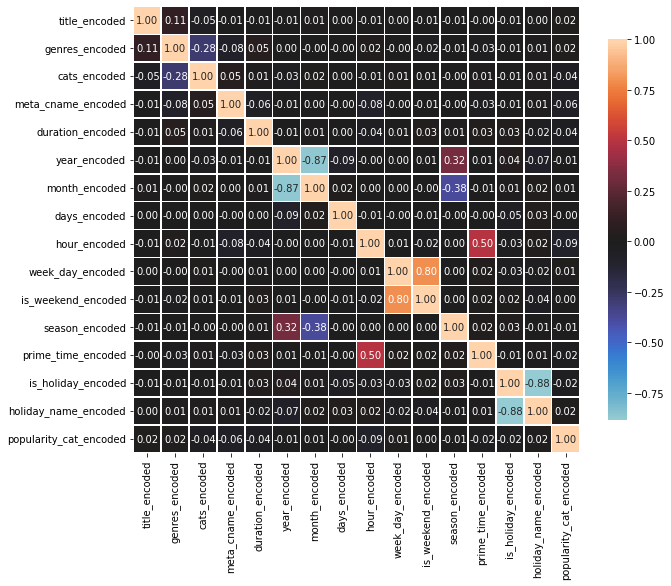

In [70]:
import seaborn as sns

def correlation_heatmap(df_ml):
    correlations = df_ml.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_ml)

#### Split data randomly into train, test and validation samples

In [71]:
import pandas as pd
df_ml = pd.read_csv('encoded_data.csv')

In [72]:
X = df_ml.iloc[:, 0:15]
y = df_ml.iloc[:, 15]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [74]:
print(X_train.shape), print(y_train.shape)

(738531, 15)
(738531,)


(None, None)

In [75]:
print(X_test.shape), print(y_test.shape)

(184633, 15)
(184633,)


(None, None)

#### Calculate feature importance

##### Decision Tree Regressor

In [ ]:
# Commented, because not not needed anymore

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})

importances_dt = importances.sort_values(by='Importance', ascending=False)

importances_dt

,Attribute,Importance
3,meta_cname_encoded,0.272194
0,title_encoded,0.122775
8,hour_encoded,0.122079
4,duration_encoded,0.112169
7,days_encoded,0.092105
1,genres_encoded,0.077766
6,month_encoded,0.057527
9,week_day_encoded,0.050718
2,cats_encoded,0.041543
11,season_encoded,0.022743


##### XGBoost Regressor

In [ ]:
# Commented, because not not needed anymore

# from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(X_train, y_train)
# importances = pd.DataFrame(data={
#     'Attribute': X_train.columns,
#     'Importance': model.feature_importances_
# })
# importances_xgb = importances.sort_values(by='Importance', ascending=False)
# importances_xgb

##### Random Forest

In [ ]:
# Commented, because not not needed anymore

# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestRegressor
# from matplotlib import pyplot

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# importances = pd.DataFrame(data={
#     'Attribute': X_train.columns,
#     'Importance': model.feature_importances_
# })
# importances_randomForest = importances.sort_values(by='Importance', ascending=False)
# importances_randomForest

##### Gradient Boosting

In [ ]:
# Commented, because not not needed anymore

# from sklearn.datasets import make_regression
# from sklearn.ensemble import GradientBoostingRegressor
# from matplotlib import pyplot

# model = GradientBoostingRegressor()
# model.fit(X_train, y_train)
# importances = pd.DataFrame(data={
#     'Attribute': X_train.columns,
#     'Importance': model.feature_importances_
# })
# importances_gb = importances.sort_values(by='Importance', ascending=False)
# importances_gb

#### Model implementation. 
##### Metrics will be: Accuracy, Precision, Recall, F1_score, AUC/ROC curve

##### Decision Tree

In [90]:
from sklearn import tree

model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

DT_prediction = model_DT.predict(X_test)

In [92]:
confusion_matrix(y_test, DT_prediction)

array([[58773,  3218,   191, 12019],
       [ 3458, 11085,   704,   638],
       [  221,   798,  2933,   122],
       [13435,   705,   133, 76200]])

In [94]:
f1_score(y_test, DT_prediction, average='macro')

0.7655141018461202

In [95]:
accuracy_score(y_test, DT_prediction)

0.8069575861303234

In [77]:
model_DT.score(X_test, y_test)

0.8070009153293289

##### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=130)
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=130)

In [79]:
RF_prediction = model_RF.predict(X_test)

In [81]:
confusion_matrix(y_test, RF_prediction)

array([[59669,  2309,   288, 11935],
       [ 3933, 10510,   533,   909],
       [  354,   781,  2676,   263],
       [10443,   745,   247, 79038]])

In [85]:
f1_score(y_test, RF_prediction, average='macro')

0.7621505248630771

In [83]:
accuracy_score(y_test, RF_prediction)

0.822675253069603

In [ ]:
model_RF.score(X_test, y_test)

0.8223990294259422

##### Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)

GB_prediction = model_GB.predict(X_test)

In [87]:
confusion_matrix(y_test, GB_prediction)

array([[41047,   451,   218, 32485],
       [11578,  2198,   258,  1851],
       [ 1684,   574,  1714,   102],
       [15610,   428,    84, 74351]])

In [88]:
f1_score(y_test, GB_prediction, average='macro')

0.520229831822796

In [89]:
accuracy_score(y_test, GB_prediction)

0.6462008416696907

In [ ]:
model_GB.score(X_test, y_test)

0.6462008416696907

##### XGBoost

In [98]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor()

model_XGB.fit(X_train, y_train, verbose=False)

[22:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [99]:
XGB_prediction = model_XGB.predict(X_test)

In [112]:
y_pred = model_XGB.predict(X_test)
XGB_prediction = [round(value) for value in y_pred]

accuracy_score(y_test, XGB_prediction)

0.08601929232585724

##### Neural Networks

In [106]:
from tensorflow import keras
# from tensorflow.keras import layers
import tensorflow as tf

model_NN = keras.Sequential([
                keras.layers.Dense(128,activation = tf.nn.sigmoid),                          
                keras.layers.Dense(10,activation = tf.nn.softmax)
                ])
model_NN.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy', 'categorical_accuracy'])

In [107]:
model_NN.fit(X_train, y_train)

23080/23080 [==============================] - 36s 2ms/step - loss: 1.0177 - accuracy: 0.4796 - categorical_accuracy: 0.0999
